In [773]:
#Import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from numpy.polynomial import Polynomial as Poly
import scipy.stats as ss
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit

In [774]:
#Read the DataSet
data=pd.read_csv('NY-House-Dataset.csv')

In [775]:
#Check the columns we have
print(data.columns)

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [776]:
#Check number of properties given the dataset
print(data.size)

81617


In [777]:
#Check key numerical variables
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [813]:
def moments_print(x,t):
    '''
    Define the function to calculate the momentus 3 and 4
    '''
    skew=np.round(ss.skew(x),3)
    kurt=np.round(ss.kurtosis(x),3)
    return print(t+'\n'+'Skewness={s}\n'.format(s=skew)+'Kurthosis={k}'.format(k=kurt)+'\n')

In [814]:
def boxplot(x,title,y_label):
    '''
    Create the boxplot for numerical var
    '''
    fig,axs=plt.subplots(dpi=144)
    axs.boxplot(x)
    axs.set_title(title)
    axs.set_ylabel(y_label)
    plt.savefig(title+'.jpg')
    plt.show()
    return

In [815]:
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

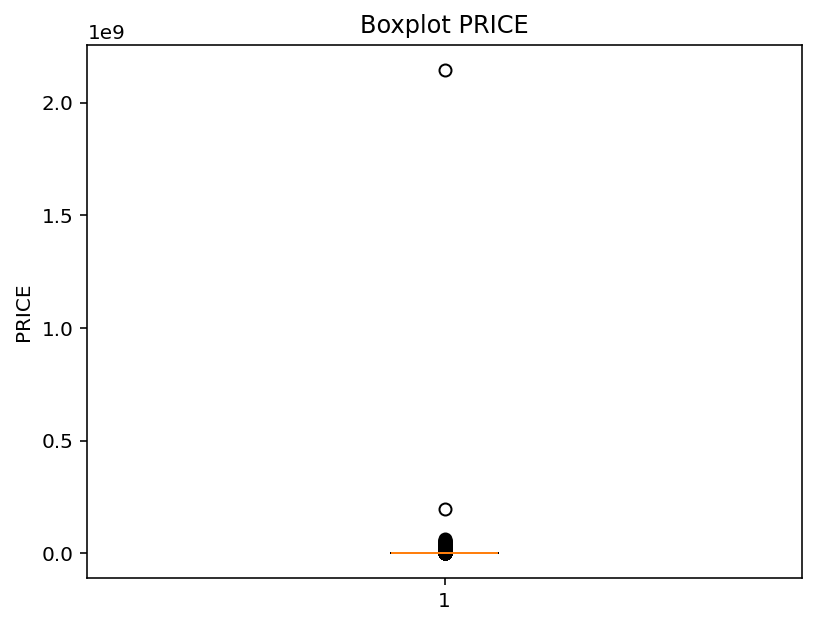

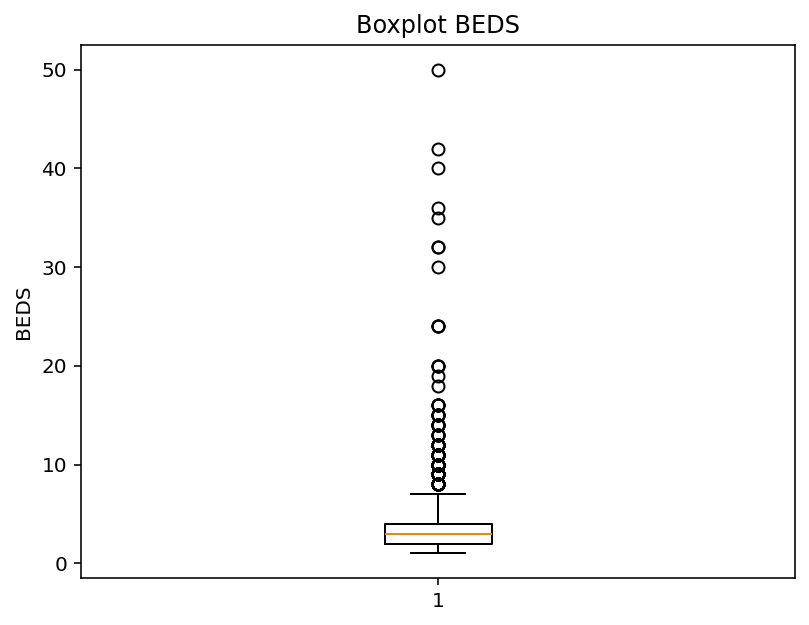

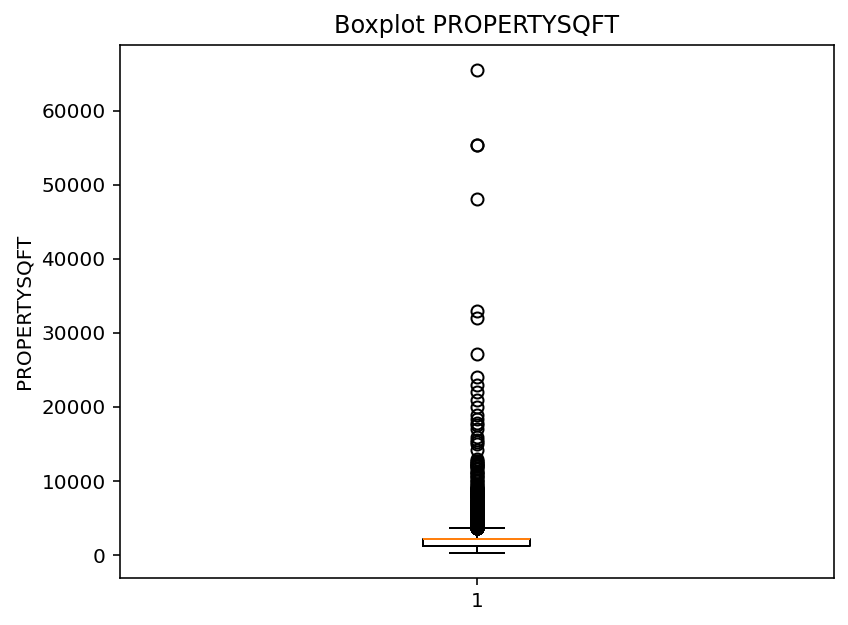

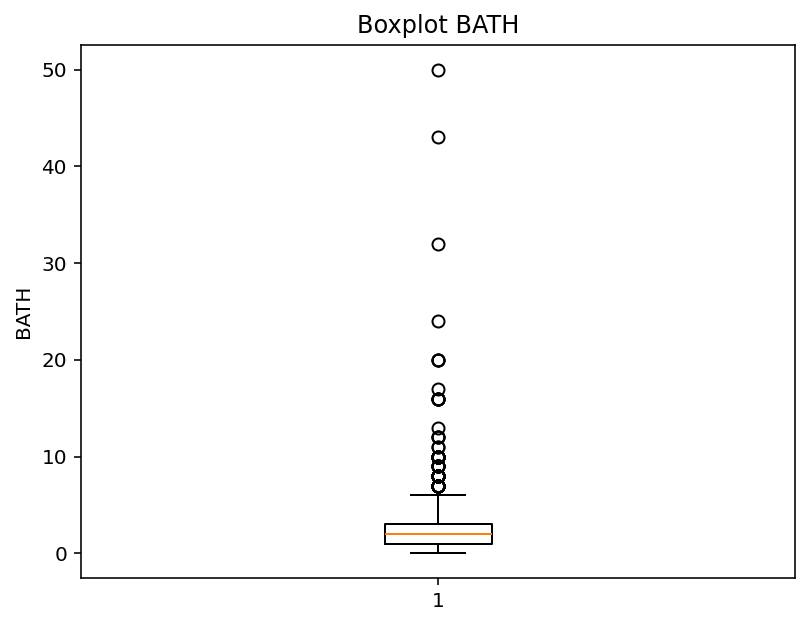

In [823]:
for c in ['PRICE','BEDS','PROPERTYSQFT','BATH']:
    boxplot(data[c],'Boxplot {v}'.format(v=c),c)

In [817]:
#Delete the outliers considering the boxplot
data_clean=data[['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']].copy()
for c in ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']:
    quartile1 = data_clean[c].quantile(0.25)
    quartile3 = data_clean[c].quantile(0.75)
    inter_quartile = quartile3 - quartile1
    lower_bound = quartile1 - 1.5 * inter_quartile
    upper_bound = quartile3 + 1.5 * inter_quartile
    data_clean[c] = data_clean[(data_clean[c] >= lower_bound) & (data_clean[c] <= upper_bound)][c]

In [818]:
#Delete the null values
data_clean.dropna(inplace=True);

In [819]:
#Check again the values of the data cleaned
data_clean.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3.834000e+03,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000
mean,8.453288e+05,2.768910,1.891282,1695.454029,40.717490,-73.926280
std,5.751844e+05,1.436294,0.950431,680.847700,0.085288,0.094253
min,2.494000e+03,1.000000,0.000000,230.000000,40.531257,-74.161888
25%,4.190000e+05,2.000000,1.000000,1065.000000,40.640877,-73.979985
50%,6.990000e+05,3.000000,2.000000,1977.500000,40.727576,-73.935517
75%,1.090000e+06,3.000000,2.000000,2184.207862,40.772065,-73.857265
max,2.980000e+06,7.000000,6.000000,3645.000000,40.912729,-73.702450


In [820]:
for c in ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']:
    moments_print(data_clean[c],c)

PRICE
Skewness=1.319
Kurthosis=1.531

BEDS
Skewness=0.808
Kurthosis=0.328

BATH
Skewness=1.277
Kurthosis=1.944

PROPERTYSQFT
Skewness=-0.069
Kurthosis=-0.722

LATITUDE
Skewness=0.073
Kurthosis=-0.696

LONGITUDE
Skewness=-0.181
Kurthosis=-0.025



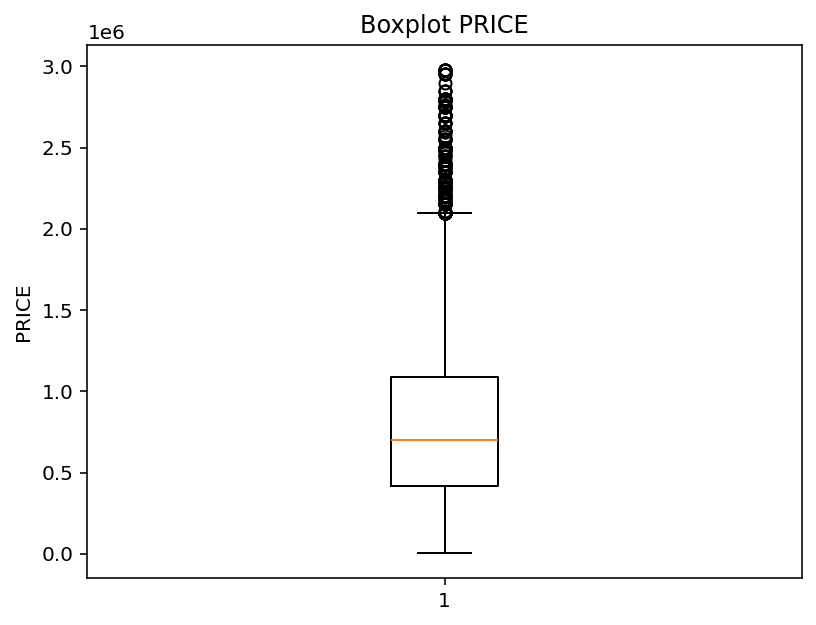

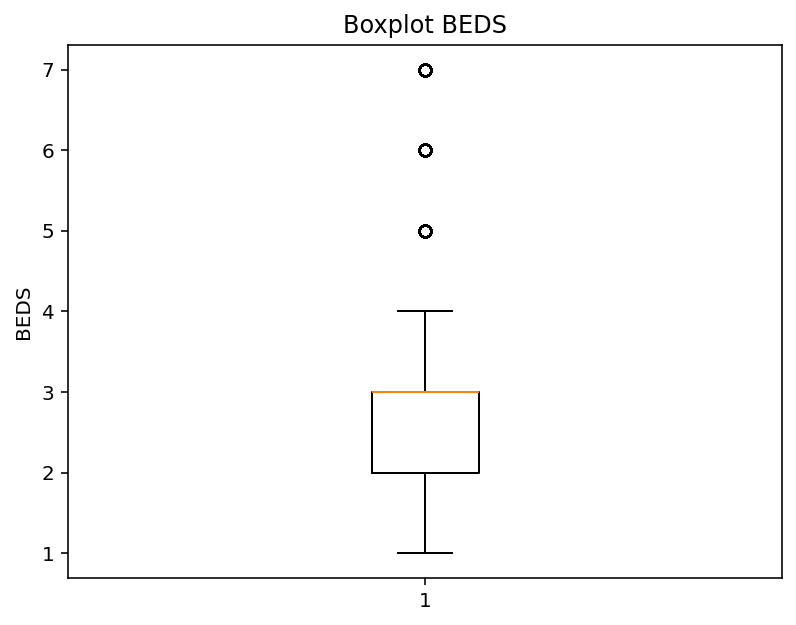

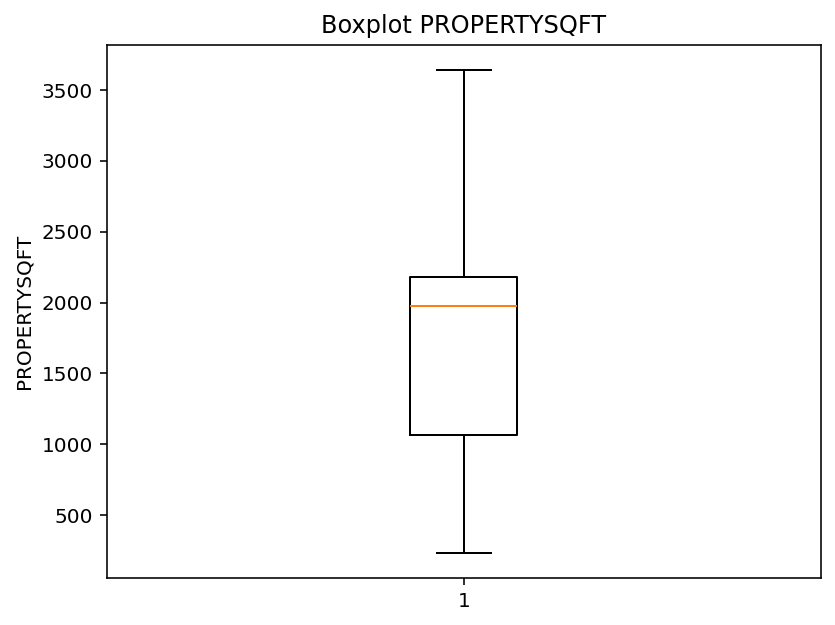

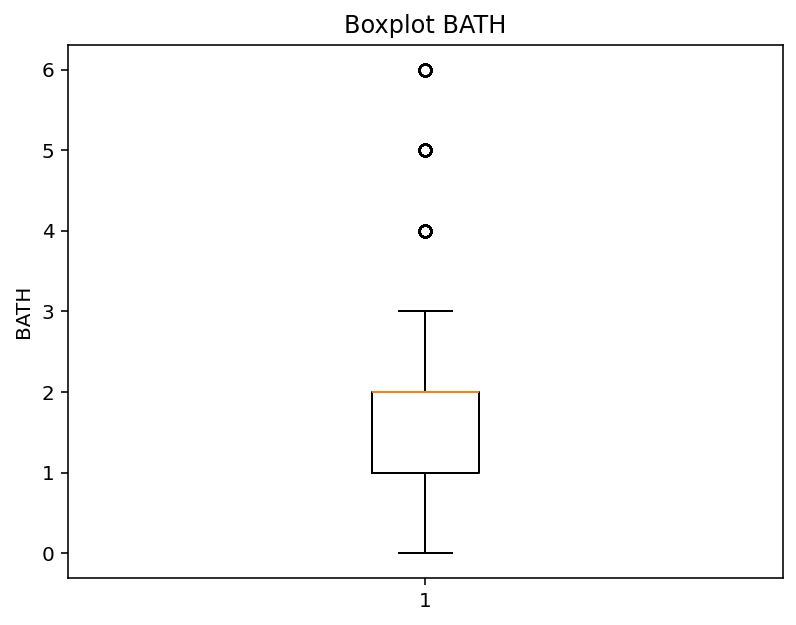

In [821]:
#Check again the boxplots
for c in ['PRICE','BEDS','PROPERTYSQFT','BATH']:
    boxplot(data_clean[c],'Boxplot {v}'.format(v=c),c)

In [787]:
def histogram_prices(min,max,count,mean):
    '''
    Function to create the histogram of prices of properties
    '''
    fig,axs=plt.subplots(dpi=144)
    axs.hist(min,max,weights=count,alpha=0.5,edgecolor='black',color='blue')
    axs.axvline(x=mean,color='k',linestyle='--',label='mean:{v}'.format(v=np.round(mean,2)))
    axs.set_title('Histogram Price of properties (USD)')
    axs.set_xlabel('Price of properties (USD)')
    axs.set_ylabel('Frecuency of properties')
    axs.legend()
    plt.show()
    return

In [788]:
#Create the parametters for the histogram
count,bins=np.histogram(data_clean['PRICE'],bins=25)
mean=data_clean['PRICE'].mean()

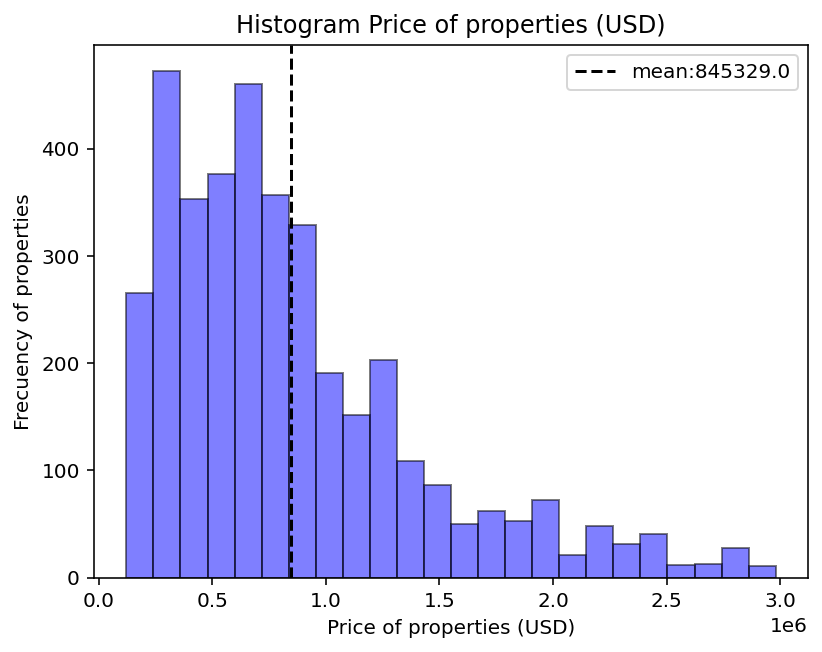

In [789]:
#Create the histogram of the prices
histogram_prices(bins[:-1],bins[1:],count,np.round(mean,0))

In [790]:
def scatter_prices_area(x,y):
    '''
    Create function to create the scatter plot for spending
    '''
    fig,axs=plt.subplots(dpi=144)
    axs.scatter(x,y,color='blue')
    axs.set_title('Norm - Price properties (USD) vs Area properties (m2)')
    axs.set_ylabel('Norm - Price properties (USD)')
    axs.set_xlabel('Norm - Area properties (m2)')
    axs.grid()
    plt.show()

In [791]:
def norm(x):
    '''
    Function to normalize the variable
    '''
    mean=np.mean(x)
    std=np.std(x)
    x_norm=(x-mean)/std
    return x_norm

In [792]:
#Normalize Income and Spending with StandardScale
prop_normalized=norm(data_clean['PROPERTYSQFT'])
price_normalized=norm(data_clean['PRICE'])

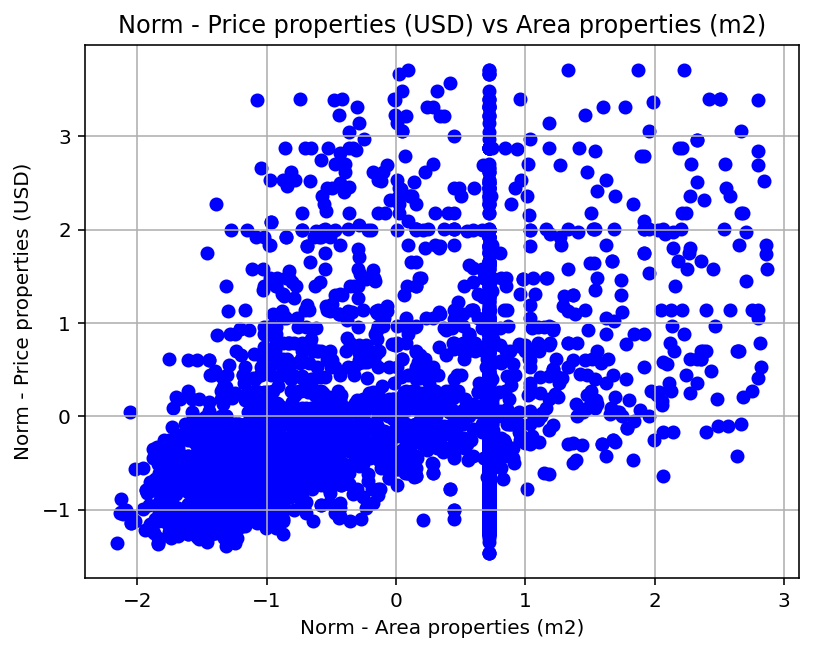

In [793]:
#Scatterplot of Income vs Spending
scatter_prices_area(prop_normalized,price_normalized)

In [794]:
def correlation_plot(base,method):
    '''
    Corner Heatmap of correlation
    '''
    fig,ax=plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(base.corr()))
    sns.heatmap(base.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title('Heatmap Correlation '+method)
    plt.show()
    return

In [795]:
#Create a Database with variables normalized
data_normalized=data_clean.copy()
for c in list(data_normalized.columns):
    data_normalized[c]=norm(data[c])

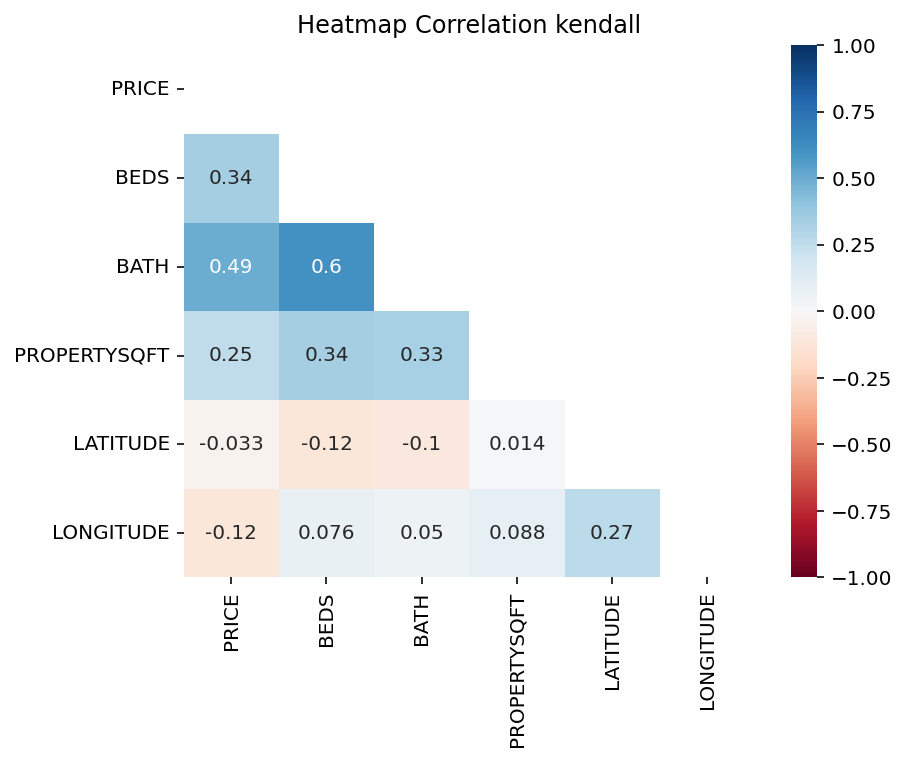

In [796]:
correlation_plot(data_normalized,'kendall')

In [797]:
def silhoutte_inertia(n,m):
    '''
    Simulate the K-means and calculates the inertia by N-groups
    '''
    kmeans=KMeans(n_clusters=n,n_init=20)
    kmeans.fit(m)
    labels=kmeans.labels_
    score=silhouette_score(m,labels)
    inertia=kmeans.inertia_
    return score,inertia

In [798]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    '''
    Plots the elbow method to get the better N-groups
    '''
    fig, axs = plt.subplots(dpi=144)
    axs.plot(range(min_k, max_k + 1), wcss, 'kx-')
    axs.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    axs.set_xlabel('Number of groups')
    axs.set_xlim(min_k, max_k)
    axs.set_ylabel('WCSS')
    axs.set_title('WBC by N groups for K-Means')
    plt.show()
    return

 2 clusters silhoutte score = 0.43
 3 clusters silhoutte score = 0.43
 4 clusters silhoutte score = 0.45
 5 clusters silhoutte score = 0.48
 6 clusters silhoutte score = 0.46
 7 clusters silhoutte score = 0.46
 8 clusters silhoutte score = 0.45
 9 clusters silhoutte score = 0.44
10 clusters silhoutte score = 0.44
Best number of clusters =  5


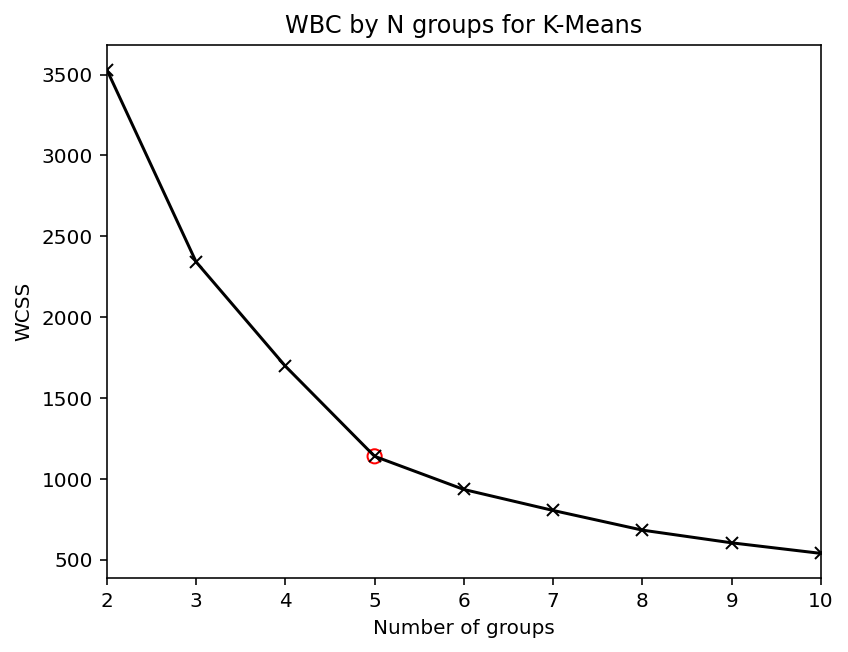

In [799]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = silhoutte_inertia(n, data_normalized[['LATITUDE','LONGITUDE']])
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

In [800]:
def plot_kmeans(labels,xy,xkmeans,ykmeans,centre_labels):
    '''
    Plot the results of the grouped K-means data with the centers of each group
    '''
    colours = plt.cm.Set2(np.linspace(0, 1, len(np.unique(labels))))
    cmap=ListedColormap(colours) 
    fig,axs=plt.subplots(dpi=144)
    s=axs.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o')
    axs.plot(xkmeans,ykmeans, 'kD', ms=10, label='Centres') 
    cbar=fig.colorbar(s,ax=axs)
    cbar.set_ticks(np.unique(labels))
    axs.set_ylabel('Latitude')
    axs.set_xlabel('Longitude')
    axs.set_title('K-Means | Latitude - Longitude')
    plt.legend()
    plt.show()
    return

In [801]:
#Cut the data used in the clustering
data_cut=data_clean[['LATITUDE','LONGITUDE']]

In [802]:
#Normalize the data with Standard Normalization mean and std
scaler=StandardScaler()
norm=scaler.fit_transform(data_cut)
inv_norm=scaler.inverse_transform(norm)

In [803]:
#Create and plot the K-means with the optimal N of groups
kmeans=KMeans(n_clusters=5,n_init=20)
kmeans.fit(norm)
labels=kmeans.labels_
cen=scaler.inverse_transform(kmeans.cluster_centers_)
xkmeans=cen[:,0]
ykmeans=cen[:,1]
cenlabels=kmeans.predict(kmeans.cluster_centers_)

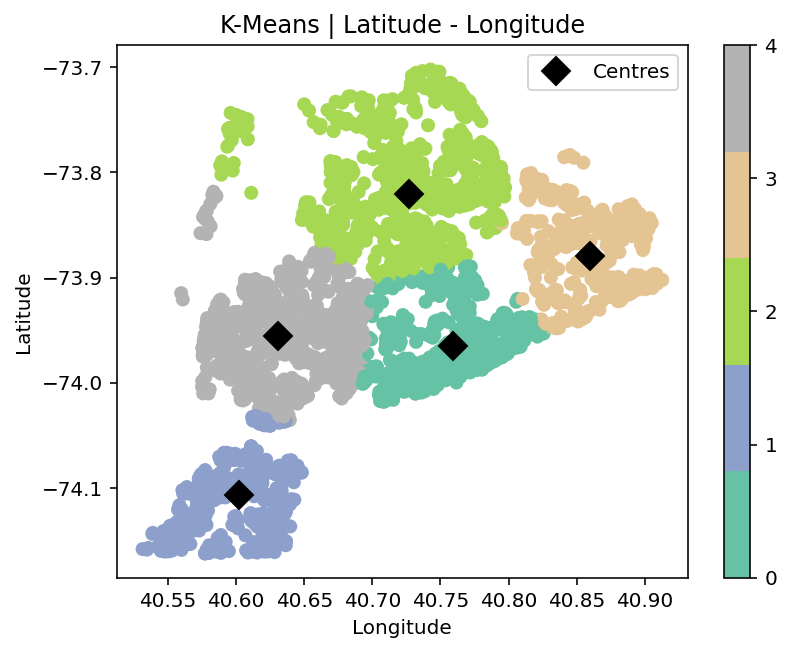

In [804]:
#Plot the K-means based on geograpgycal data
plot_kmeans(labels, inv_norm, xkmeans, ykmeans, cenlabels)

In [805]:
#Lets create a model fitted to price based on area of the property
p_n=Poly.fit(data_clean['PROPERTYSQFT'],data_clean['PRICE'],1)
cov=np.polyfit(data_clean['PROPERTYSQFT'],data_clean['PRICE'],1,cov=True)[1]
sigma_np=np.sqrt(np.diag(cov))
b, a = p_n.convert().coef  # note the opposite order of coefficients
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

a = 292.47 +/- 12.80
b = 349454.38 +/- 23391.84


In [806]:
def plot_random_scatter_with_fitted_line(x, y, xline, yline):
    '''
    Creates a scatter plot of random x and y data with overplotted line
    '''
    fig,axs=plt.subplots(dpi=144)
    axs.scatter(x, y)
    axs.plot(xline, yline, 'k-',label='Fitted Line')
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'k-')
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.4,label='Error')
    axs.set_xlabel('Area property')
    axs.set_ylabel('Price property')
    axs.set_title('Linear model Area - Price')
    plt.legend()
    plt.show()
    return

In [807]:
# now let's actually fit this data instead of just the assumed model
def linfunc(x, a, b):
    '''
    Function for fitting a straight line
    '''
    y = a*x + b
    return y

In [808]:
x=data_clean['PROPERTYSQFT']
y=data_clean['PRICE']
y_2=linfunc(data_clean['PROPERTYSQFT'],a,b)
p, cov = curve_fit(linfunc, x, y)
sigma = np.sqrt(np.diag(cov))

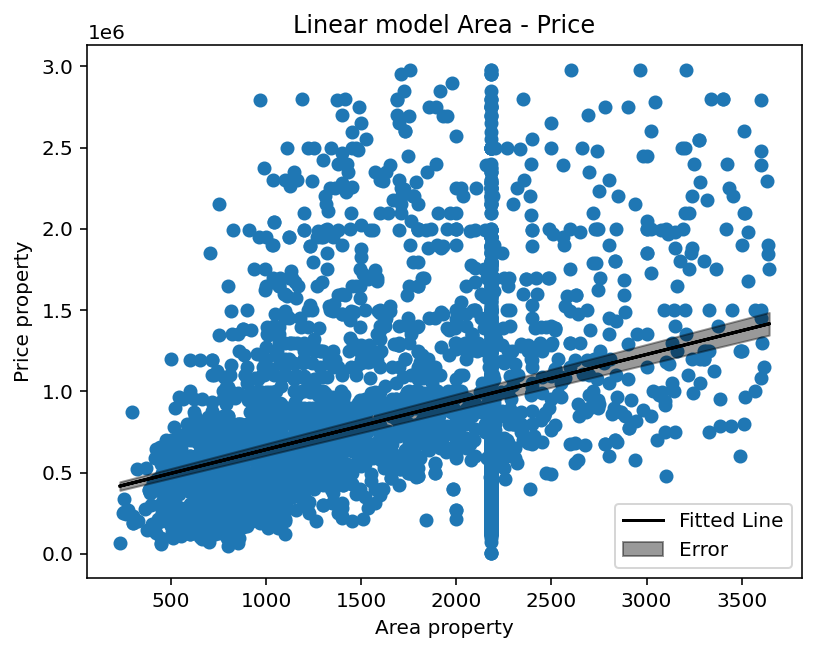

In [809]:
plot_random_scatter_with_fitted_line(x,y,x,y_2)

In [810]:
mse=np.mean((y_2-y)**2)

In [811]:
print('Mean Squared Error: ',np.sqrt(mse))

Mean Squared Error:  539544.8267722329


In [812]:
np.mean(y)

845328.7605633803